In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

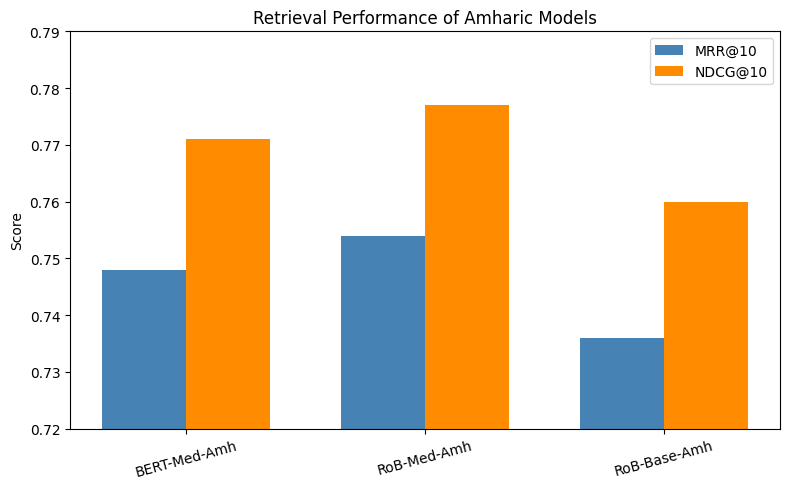

In [2]:

# Data
models = ['BERT-Med-Amh', 'RoB-Med-Amh', 'RoB-Base-Amh']
mrr = [0.748, 0.754, 0.736]
ndcg = [0.771, 0.777, 0.760]

x = np.arange(len(models))  # label locations
width = 0.35  # width of the bars

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Bars
bars1 = ax.bar(x - width/2, mrr, width, label='MRR@10', color='steelblue')
bars2 = ax.bar(x + width/2, ndcg, width, label='NDCG@10', color='darkorange')

# Labels and title
ax.set_ylabel('Score')
ax.set_ylim(0.72, 0.79)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.set_title('Retrieval Performance of Amharic Models')
ax.legend()


plt.tight_layout()
plt.savefig("amharic_model_performance.png", dpi=300)  # Save as HD image
plt.show()


In [3]:

# Add text labels above bars
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


In [4]:

annotate_bars(bars1)
annotate_bars(bars2)

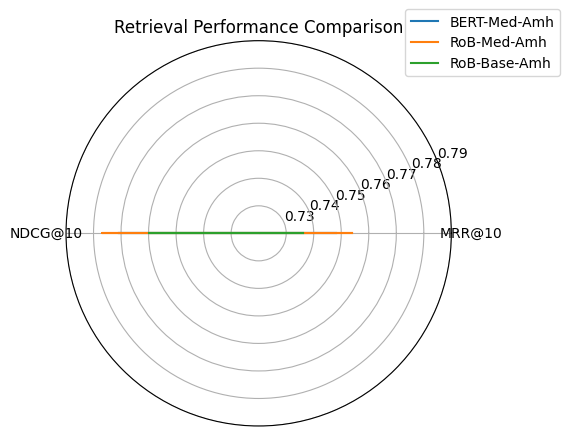

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['MRR@10', 'NDCG@10']
models = {
    'BERT-Med-Amh': [0.748, 0.771],
    'RoB-Med-Amh': [0.754, 0.777],
    'RoB-Base-Amh': [0.736, 0.760]
}

# Radar chart setup
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for name, stats in models.items():
    stats += stats[:1]  # complete loop
    ax.plot(angles, stats, label=name)
    ax.fill(angles, stats, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_ylim(0.72, 0.79)
ax.set_title("Retrieval Performance Comparison")
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.savefig("amharic_model_radar.png", dpi=300)
plt.show()


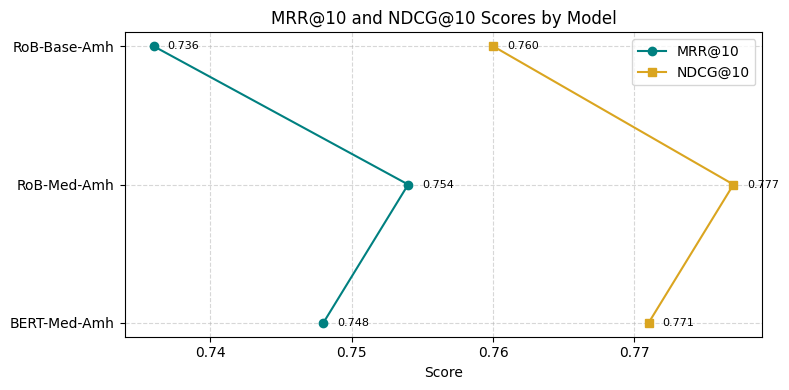

In [6]:
import matplotlib.pyplot as plt

models = ['BERT-Med-Amh', 'RoB-Med-Amh', 'RoB-Base-Amh']
mrr = [0.748, 0.754, 0.736]
ndcg = [0.771, 0.777, 0.760]

fig, ax = plt.subplots(figsize=(8, 4))

# Plotting dots
ax.plot(mrr, models, 'o-', label='MRR@10', color='teal')
ax.plot(ndcg, models, 's-', label='NDCG@10', color='goldenrod')

# Labels and style
ax.set_xlabel('Score')
ax.set_title('MRR@10 and NDCG@10 Scores by Model')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

for i, (m, n) in enumerate(zip(mrr, ndcg)):
    ax.text(m + 0.001, models[i], f'{m:.3f}', va='center', fontsize=8)
    ax.text(n + 0.001, models[i], f'{n:.3f}', va='center', fontsize=8)

plt.tight_layout()
plt.savefig("amharic_dot_plot.png", dpi=300)
plt.show()


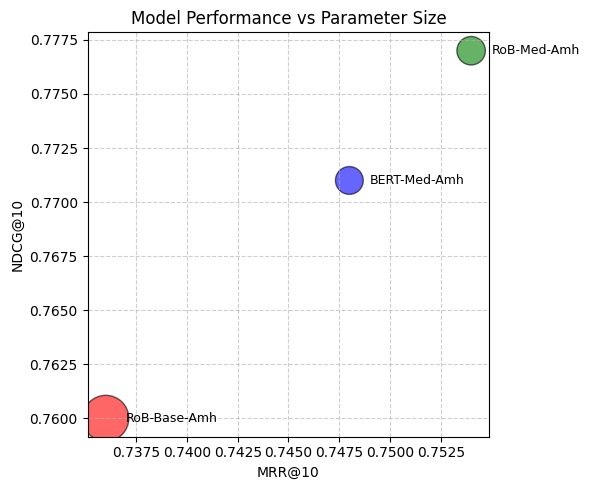

In [7]:
import matplotlib.pyplot as plt

# Data
models = ['BERT-Med-Amh', 'RoB-Med-Amh', 'RoB-Base-Amh']
mrr = [0.748, 0.754, 0.736]
ndcg = [0.771, 0.777, 0.760]
params = [40, 42, 110]  # in millions

# Normalize size for plotting
sizes = [p * 10 for p in params]

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
scatter = ax.scatter(mrr, ndcg, s=sizes, alpha=0.6, c=['blue', 'green', 'red'], edgecolors='k')

# Add labels
for i, model in enumerate(models):
    ax.text(mrr[i] + 0.001, ndcg[i], model, fontsize=9, ha='left', va='center')

# Styling
ax.set_xlabel('MRR@10')
ax.set_ylabel('NDCG@10')
ax.set_title('Model Performance vs Parameter Size')
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save HD image
plt.savefig("amharic_model_bubble_plot.png", dpi=300)
plt.show()


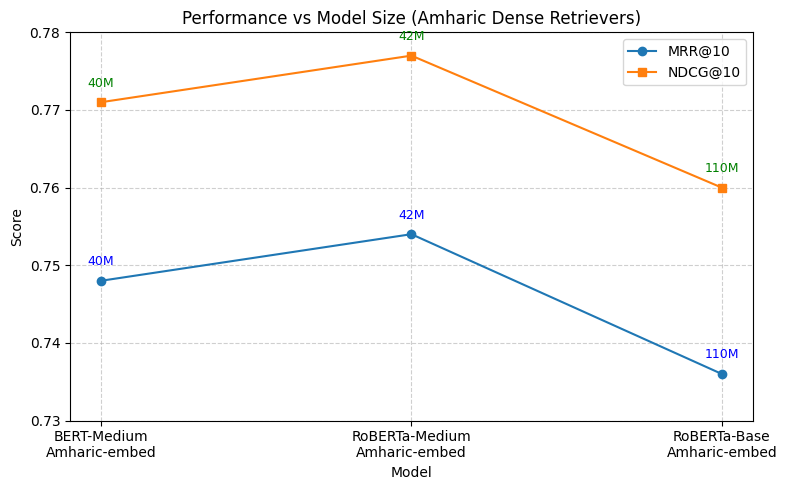

In [8]:
import matplotlib.pyplot as plt

# Model names
models = [
    "BERT-Medium\nAmharic-embed",
    "RoBERTa-Medium\nAmharic-embed",
    "RoBERTa-Base\nAmharic-embed"
]

# Parameter sizes (in millions)
params = [40, 42, 110]

# Metric values
mrr_values = [0.748, 0.754, 0.736]
ndcg_values = [0.771, 0.777, 0.760]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(models, mrr_values, marker='o', label='MRR@10')
plt.plot(models, ndcg_values, marker='s', label='NDCG@10')

# Annotate parameter size
for i, (x, y1, y2) in enumerate(zip(models, mrr_values, ndcg_values)):
    plt.text(i, y1 + 0.002, f"{params[i]}M", ha='center', fontsize=9, color='blue')
    plt.text(i, y2 + 0.002, f"{params[i]}M", ha='center', fontsize=9, color='green')

# Labeling
plt.title("Performance vs Model Size (Amharic Dense Retrievers)")
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0.73, 0.78)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()


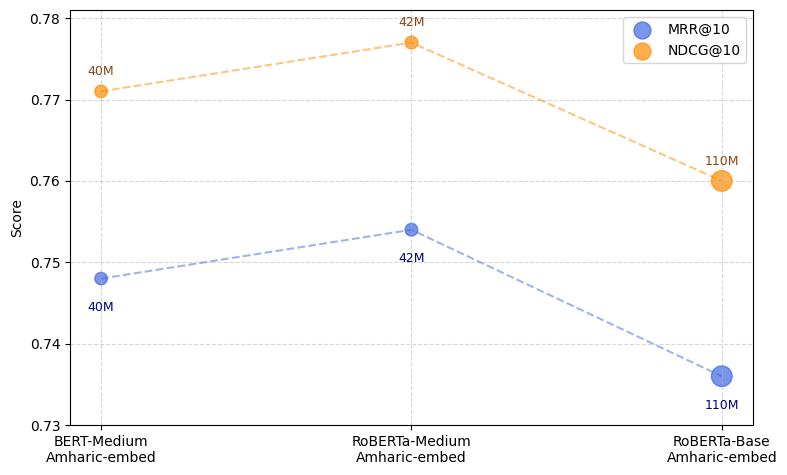

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    "BERT-Medium\nAmharic-embed",
    "RoBERTa-Medium\nAmharic-embed",
    "RoBERTa-Base\nAmharic-embed"
]
params = [40, 42, 110]  # in millions
mrr = [0.748, 0.754, 0.736]
ndcg = [0.771, 0.777, 0.760]
marker_sizes = [p * 2 for p in params]

x = np.arange(len(models))
plt.figure(figsize=(8, 5))

# Scatter points
plt.scatter(x, mrr, s=marker_sizes, label='MRR@10', color='royalblue', alpha=0.7)
plt.scatter(x, ndcg, s=marker_sizes, label='NDCG@10', color='darkorange', alpha=0.7)

# Optional lines
plt.plot(x, mrr, color='royalblue', linestyle='--', alpha=0.5)
plt.plot(x, ndcg, color='darkorange', linestyle='--', alpha=0.5)

# Adjusted annotations
for i in x:
    plt.text(i, mrr[i] - 0.004, f"{params[i]}M", ha='center', fontsize=9, color='navy')
    plt.text(i, ndcg[i] + 0.002, f"{params[i]}M", ha='center', fontsize=9, color='saddlebrown')

# Ticks and layout
plt.xticks(x, models)
plt.ylim(0.73, 0.781)  # Increased upper limit to avoid cutoff
plt.ylabel("Score")
# plt.title("Amharic Dense Retrievers: Performance vs. Model Size")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust top margin
plt.show()


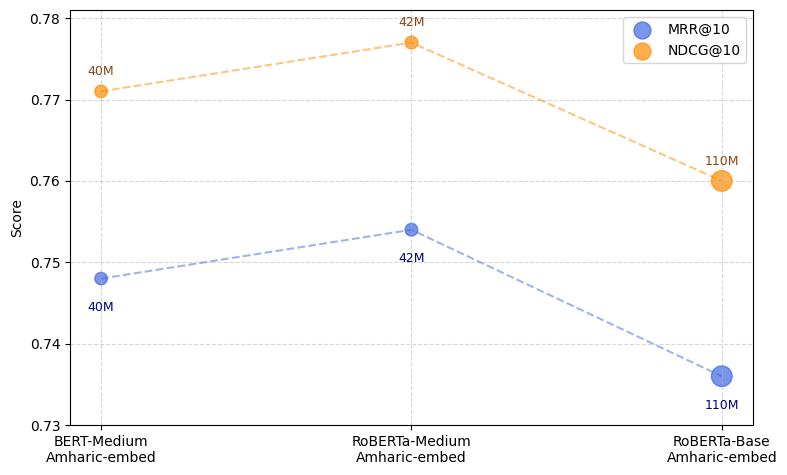

In [10]:
import matplotlib.pyplot as plt
import numpy as np
# plt.rcParams.update({
#     'font.family': 'serif',
#     'font.serif': ['Times New Roman'],
#     'font.size': 11,
#     'pdf.fonttype': 42  # Embeds fonts for publication
# })

# Data
models = [
    "BERT-Medium\nAmharic-embed",
    "RoBERTa-Medium\nAmharic-embed",
    "RoBERTa-Base\nAmharic-embed"
]
params = [40, 42, 110]  # in millions
mrr = [0.748, 0.754, 0.736]
ndcg = [0.771, 0.777, 0.760]
marker_sizes = [p * 2 for p in params]

x = np.arange(len(models))
plt.figure(figsize=(8, 5))

# Scatter points
plt.scatter(x, mrr, s=marker_sizes, label='MRR@10', color='royalblue', alpha=0.7)
plt.scatter(x, ndcg, s=marker_sizes, label='NDCG@10', color='darkorange', alpha=0.7)

# Optional lines
plt.plot(x, mrr, color='royalblue', linestyle='--', alpha=0.5)
plt.plot(x, ndcg, color='darkorange', linestyle='--', alpha=0.5)

# Annotations
for i in x:
    plt.text(i, mrr[i] - 0.004, f"{params[i]}M", ha='center', fontsize=9, color='navy')
    plt.text(i, ndcg[i] + 0.002, f"{params[i]}M", ha='center', fontsize=9, color='saddlebrown')

# Layout
plt.xticks(x, models)
plt.ylim(0.73, 0.781)
plt.ylabel("Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save as PDF
plt.savefig("output.pdf", format="pdf")

# Show plot
plt.show()


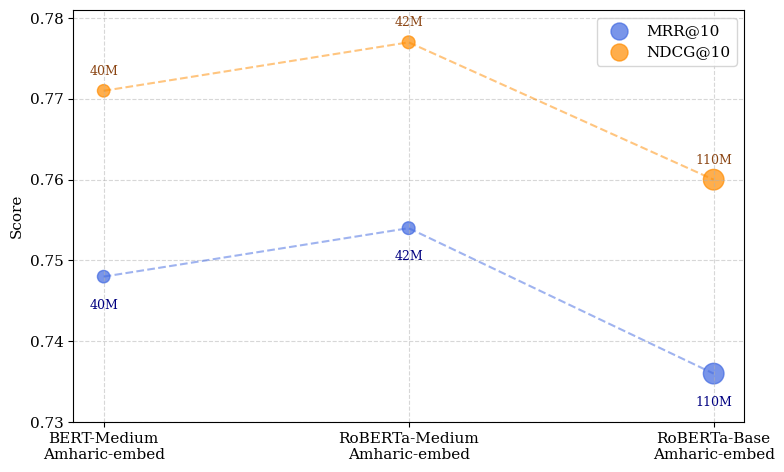

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# ACL-style font setup
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'Times', 'DejaVu Serif'],
    'font.size': 11,
    'pdf.fonttype': 42  # Ensures fonts are embedded correctly in PDF
})

# Data
models = [
    "BERT-Medium\nAmharic-embed",
    "RoBERTa-Medium\nAmharic-embed",
    "RoBERTa-Base\nAmharic-embed"
]
params = [40, 42, 110]
mrr = [0.748, 0.754, 0.736]
ndcg = [0.771, 0.777, 0.760]
marker_sizes = [p * 2 for p in params]

x = np.arange(len(models))
plt.figure(figsize=(8, 5))

plt.scatter(x, mrr, s=marker_sizes, label='MRR@10', color='royalblue', alpha=0.7)
plt.scatter(x, ndcg, s=marker_sizes, label='NDCG@10', color='darkorange', alpha=0.7)

plt.plot(x, mrr, color='royalblue', linestyle='--', alpha=0.5)
plt.plot(x, ndcg, color='darkorange', linestyle='--', alpha=0.5)

for i in x:
    plt.text(i, mrr[i] - 0.004, f"{params[i]}M", ha='center', fontsize=9, color='navy')
    plt.text(i, ndcg[i] + 0.002, f"{params[i]}M", ha='center', fontsize=9, color='saddlebrown')

plt.xticks(x, models)
plt.ylim(0.73, 0.781)
plt.ylabel("Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.97])

plt.savefig("output.pdf", format="pdf")

plt.show()


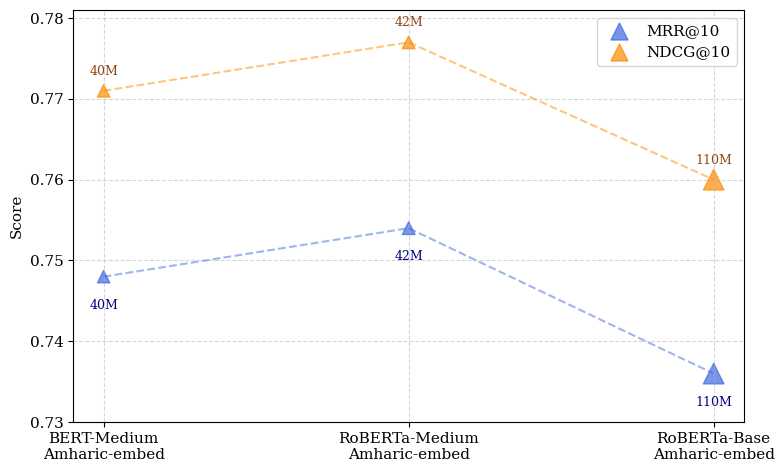

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# ACL-style font config
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'DejaVu Serif'],
    'font.size': 11,
    'pdf.fonttype': 42
})


# Data
models = [
    "BERT-Medium\nAmharic-embed",
    "RoBERTa-Medium\nAmharic-embed",
    "RoBERTa-Base\nAmharic-embed"
]
params = [40, 42, 110]
mrr = [0.748, 0.754, 0.736]
ndcg = [0.771, 0.777, 0.760]
marker_sizes = [p * 2 for p in params]

x = np.arange(len(models))
plt.figure(figsize=(8, 5))

# Use triangle markers
plt.scatter(x, mrr, s=marker_sizes, label='MRR@10', color='royalblue', alpha=0.7, marker='^')
plt.scatter(x, ndcg, s=marker_sizes, label='NDCG@10', color='darkorange', alpha=0.7, marker='^')

plt.plot(x, mrr, color='royalblue', linestyle='--', alpha=0.5)
plt.plot(x, ndcg, color='darkorange', linestyle='--', alpha=0.5)

for i in x:
    plt.text(i, mrr[i] - 0.004, f"{params[i]}M", ha='center', fontsize=9, color='navy')
    plt.text(i, ndcg[i] + 0.002, f"{params[i]}M", ha='center', fontsize=9, color='saddlebrown')

plt.xticks(x, models)
plt.ylim(0.73, 0.781)
plt.ylabel("Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.97])

plt.savefig("colbert_with_am_basemodels.pdf", format="pdf")
plt.show()


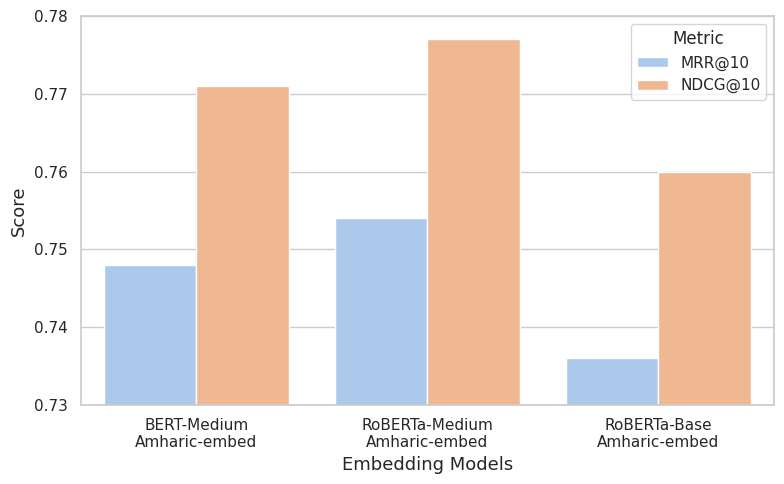

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data
models = [
    "BERT-Medium\nAmharic-embed",
    "RoBERTa-Medium\nAmharic-embed",
    "RoBERTa-Base\nAmharic-embed"
]
params = [40, 42, 110]  # in millions
mrr = [0.748, 0.754, 0.736]
ndcg = [0.771, 0.777, 0.760]

# Create DataFrame
plot_data = pd.DataFrame({
    'Model': models * 2,
    'Metric': ['MRR@10'] * 3 + ['NDCG@10'] * 3,
    'Score': mrr + ndcg
})

# Set font and style
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="whitegrid")

# 1. Grouped Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Score', hue='Metric', data=plot_data, palette='pastel')
plt.xlabel('Embedding Models', fontsize=13)
plt.ylabel('Score', fontsize=13)
plt.ylim(0.73, 0.78)
plt.tight_layout()
plt.savefig("barplot_mrr_ndcg.pdf", format="pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()




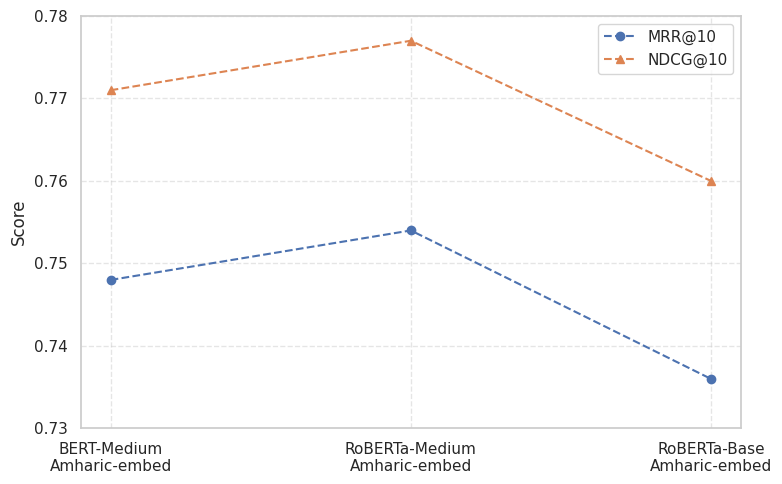

In [14]:
# 2. Dot Plot with Lines
x = np.arange(len(models))
plt.figure(figsize=(8, 5))
plt.plot(x, mrr, marker='o', label='MRR@10', linestyle='--')
plt.plot(x, ndcg, marker='^', label='NDCG@10', linestyle='--')
plt.xticks(x, models)
plt.ylim(0.73, 0.78)
plt.ylabel("Score")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("dotplot_mrr_ndcg.pdf", format="pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()



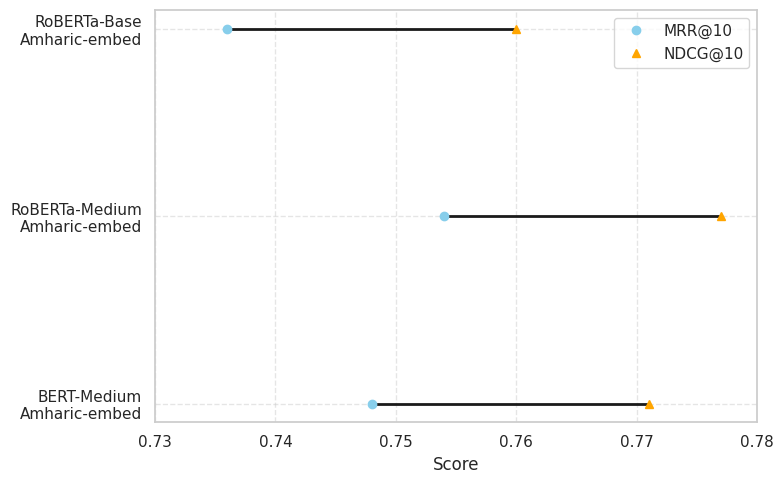

In [15]:
# 3. Dumbbell Plot
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(len(models)):
    ax.plot([mrr[i], ndcg[i]], [i, i], 'k-', lw=2)
    ax.plot(mrr[i], i, 'o', color='skyblue', label='MRR@10' if i == 0 else "")
    ax.plot(ndcg[i], i, '^', color='orange', label='NDCG@10' if i == 0 else "")
ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xlabel("Score")
ax.set_xlim(0.73, 0.78)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("dumbbell_mrr_ndcg.pdf", format="pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()

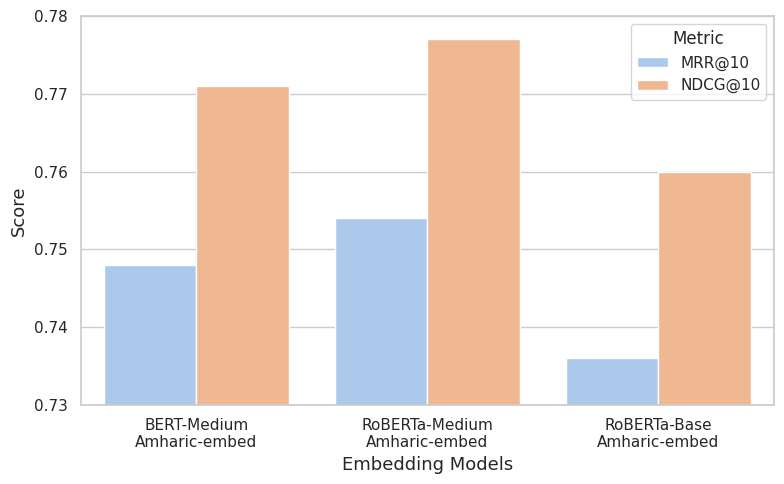

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data
models = [
    "BERT-Medium\nAmharic-embed",
    "RoBERTa-Medium\nAmharic-embed",
    "RoBERTa-Base\nAmharic-embed"
]
params = [40, 42, 110]  # in millions
mrr = [0.748, 0.754, 0.736]
ndcg = [0.771, 0.777, 0.760]

# Create DataFrame
plot_data = pd.DataFrame({
    'Model': models * 2,
    'Metric': ['MRR@10'] * 3 + ['NDCG@10'] * 3,
    'Score': mrr + ndcg
})

# Set font and style
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="whitegrid")

# 1. Grouped Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Score', hue='Metric', data=plot_data, palette='pastel')
plt.xlabel('Embedding Models', fontsize=13)
plt.ylabel('Score', fontsize=13)
plt.ylim(0.73, 0.78)
plt.tight_layout()
plt.savefig("barplot_mrr_ndcg.pdf", format="pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()


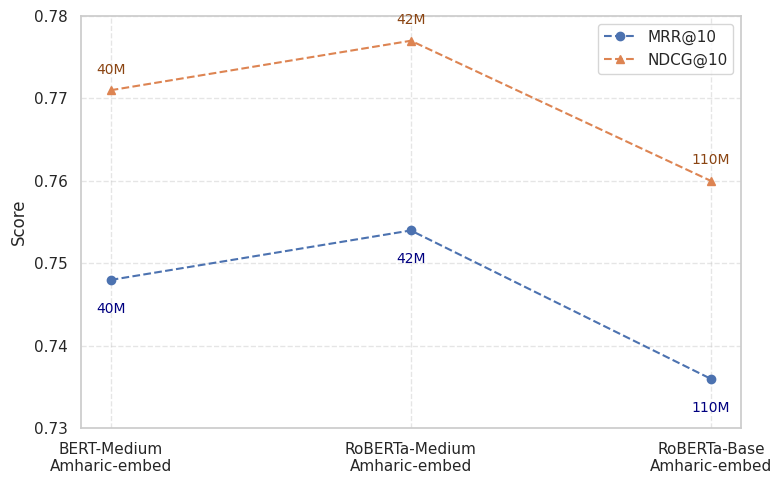

In [23]:

# 2. Dot Plot with Lines + Params
x = np.arange(len(models))
plt.figure(figsize=(8, 5))
plt.plot(x, mrr, marker='o', label='MRR@10', linestyle='--')
plt.plot(x, ndcg, marker='^', label='NDCG@10', linestyle='--')
plt.xticks(x, models)
plt.ylim(0.73, 0.78)
plt.ylabel("Score")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Add parameter annotations
for i in x:
    plt.text(i, mrr[i] - 0.004, f"{params[i]}M", ha='center', fontsize=10, color='navy')
    plt.text(i, ndcg[i] + 0.002, f"{params[i]}M", ha='center', fontsize=10, color='saddlebrown')

plt.tight_layout()
plt.savefig("dotplot_mrr_ndcg.pdf", format="pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()



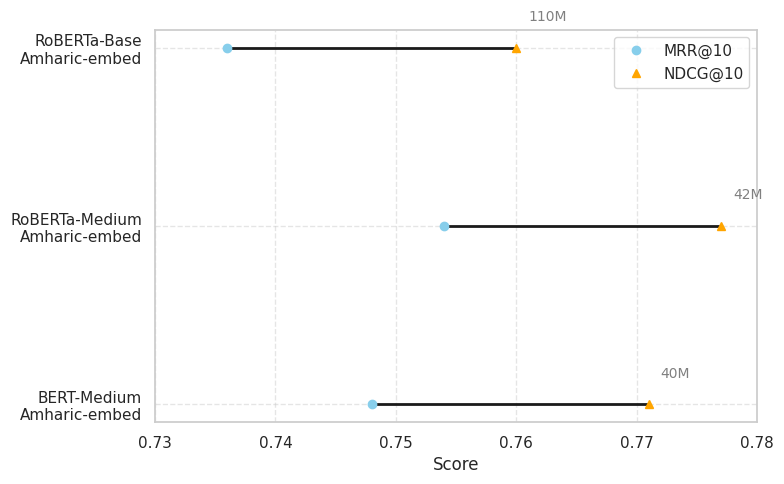

In [24]:
# 3. Dumbbell Plot
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(len(models)):
    ax.plot([mrr[i], ndcg[i]], [i, i], 'k-', lw=2)
    ax.plot(mrr[i], i, 'o', color='skyblue', label='MRR@10' if i == 0 else "")
    ax.plot(ndcg[i], i, '^', color='orange', label='NDCG@10' if i == 0 else "")
    ax.text(ndcg[i] + 0.001, i + 0.15, f"{params[i]}M", fontsize=10, color='gray')

ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xlabel("Score")
ax.set_xlim(0.73, 0.78)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("dumbbell_mrr_ndcg.pdf", format="pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()


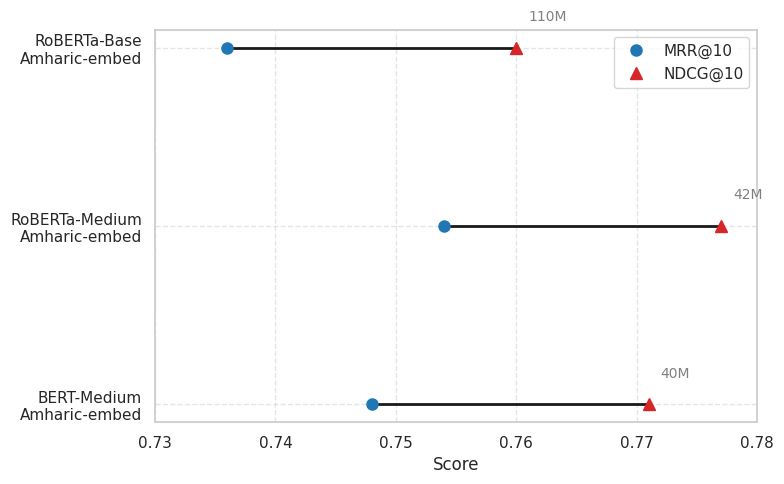

In [25]:

# Dumbbell Plot with enhanced colors
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(len(models)):
    ax.plot([mrr[i], ndcg[i]], [i, i], 'k-', lw=2)
    ax.plot(mrr[i], i, 'o', color='#1f77b4', markersize=8, label='MRR@10' if i == 0 else "")
    ax.plot(ndcg[i], i, '^', color='#d62728', markersize=9, label='NDCG@10' if i == 0 else "")
    ax.text(ndcg[i] + 0.001, i + 0.15, f"{params[i]}M", fontsize=10, color='gray')

ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xlabel("Score")
ax.set_xlim(0.73, 0.78)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("dumbbell_mrr_ndcg.pdf", format="pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()

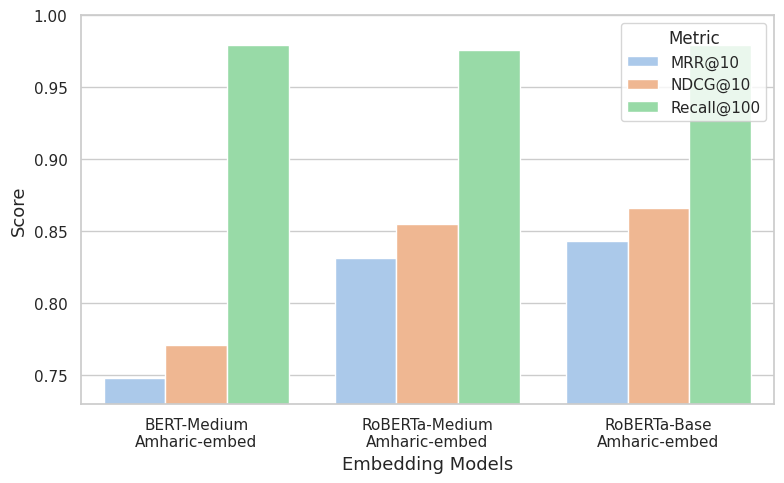

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data
models = [
    "BERT-Medium\nAmharic-embed",
    "RoBERTa-Medium\nAmharic-embed",
    "RoBERTa-Base\nAmharic-embed"
]
params = [40, 42, 110]  # in millions
mrr = [0.748, 0.831, 0.843]
ndcg = [0.771, 0.855, 0.866]
recall100 = [0.979, 0.976, 0.979]

# Create DataFrame
plot_data = pd.DataFrame({
    'Model': models * 3,
    'Metric': ['MRR@10'] * 3 + ['NDCG@10'] * 3 + ['Recall@100'] * 3,
    'Score': mrr + ndcg + recall100
})

# Set font and style
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="whitegrid")

# Grouped Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Score', hue='Metric', data=plot_data, palette='pastel')
plt.xlabel('Embedding Models', fontsize=13)
plt.ylabel('Score', fontsize=13)
plt.ylim(0.73, 1.0)
plt.tight_layout()
plt.savefig("barplot_mrr_ndcg_recall100.pdf", format="pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()

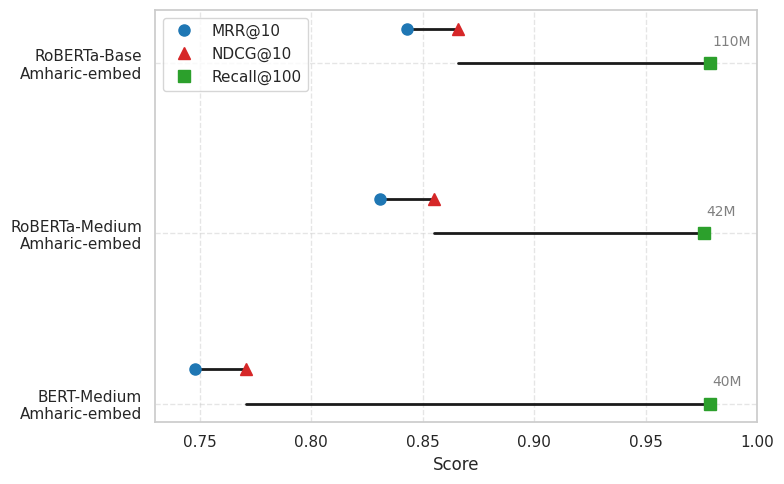

In [27]:
# Dumbbell Plot with Recall@100 added
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(len(models)):
    ax.plot([mrr[i], ndcg[i]], [i + 0.2, i + 0.2], 'k-', lw=2)
    ax.plot([ndcg[i], recall100[i]], [i, i], 'k-', lw=2)
    ax.plot(mrr[i], i + 0.2, 'o', color='#1f77b4', markersize=8, label='MRR@10' if i == 0 else "")
    ax.plot(ndcg[i], i + 0.2, '^', color='#d62728', markersize=9, label='NDCG@10' if i == 0 else "")
    ax.plot(recall100[i], i, 's', color='#2ca02c', markersize=8, label='Recall@100' if i == 0 else "")
    ax.text(recall100[i] + 0.001, i + 0.1, f"{params[i]}M", fontsize=10, color='gray')

ax.set_yticks(np.arange(len(models)))
ax.set_yticklabels(models)
ax.set_xlabel("Score")
ax.set_xlim(0.73, 1.0)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("dumbbell_mrr_ndcg_recall100.pdf", format="pdf", bbox_inches='tight', dpi=300)
plt.show()
plt.close()